In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using PhasorNetworks
using Plots
using Random: Xoshiro, AbstractRNG

In [3]:
include("resonator.jl")

factor3_test_spiking (generic function with 1 method)

In [4]:
n_cb = 20
n_vsa = 1024

1024

In [80]:
#rng0 = Xoshiro(42)

In [81]:
rng0  = Xoshiro(0xf8ad00b835661f2b, 0x355f23e4e4e35ac1, 0x3e756aff77db0458, 0x5a3f9ba374307a2d, 0x1dac972c6a4f2be7)

Xoshiro(0xf8ad00b835661f2b, 0x355f23e4e4e35ac1, 0x3e756aff77db0458, 0x5a3f9ba374307a2d, 0x1dac972c6a4f2be7)

In [82]:
using DifferentialEquations: Heun, Tsit5

In [83]:
sa = SpikingArgs(solver = Heun(),
solver_args = Dict(:adaptive => false, 
                :dt => 0.01),
                threshold = 0.001)

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)


In [84]:
repeats = 20
tspan = (0.0, repeats * sa.t_period)

(0.0, 20.0)

In [85]:
X_cb = random_symbols((n_cb, n_vsa), rng0)
Y_cb = random_symbols((n_cb, n_vsa), rng0)
Z_cb = random_symbols((n_cb, n_vsa), rng0);

In [86]:
rng1 = deepcopy(rng0)

Xoshiro(0xf1dc6e556c5dc837, 0xbe7b39feaa17ed37, 0x7c105d952d9c97c9, 0x76d802c06d81c915, 0x1dac972c6a4f2be7)

In [87]:
ptt = x -> phase_to_train(x, spk_args=sa, repeats = repeats)

#82 (generic function with 1 method)

In [88]:
X_cb2 = ptt(X_cb)
Y_cb2 = ptt(Y_cb)
Z_cb2 = ptt(Z_cb);

In [89]:
fac_i, fac_spk, sym_spk = generate_composition(rng0, sa, tspan, X_cb2, Y_cb2, Z_cb2)

([10, 10, 8], SpikeTrain[Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.], Spike Train: (1, 1024) with 19009 spikes.)

In [90]:
fac_i2, fac_phase, sym_phase = generate_composition(rng1, X_cb, Y_cb, Z_cb)

([10, 10, 8], [-0.24469029903411865 -0.754835844039917 … 0.22937357425689697 0.8734973669052124; -0.1731419563293457 -0.16433393955230713 … -0.870708703994751 -0.5202574729919434; -0.10237479209899902 -0.24121713638305664 … -0.5095124244689941 -0.746134877204895], [-0.5202070474624634 0.8396130800247192 … 0.8491524457931519 -0.392894983291626])

In [91]:
sym_spk_dec = train_to_phase(sym_spk, sa)[end-1,:,:]

1×1024 Matrix{Float64}:
 -0.542888  0.816025  0.874872  0.615456  …  -0.848789  0.825908  -0.415034

In [92]:
#check similarity of composed symbol
similarity(sym_phase, sym_spk_dec)

1×1 Matrix{Float64}:
 0.9975153326004291

In [93]:
xx = v_unbind(sym_spk, v_bind(fac_spk[3],fac_spk[2], spk_args=sa, tspan=tspan), spk_args=sa, tspan=tspan)

Spike Train: (1, 1024) with 17904 spikes.

In [94]:
sxs = similarity_outer(xx, X_cb2, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

1×20 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … 0.00203673 0.00202655]  …  [-1.0 -1.0 … -0.0192821 -0.019307]

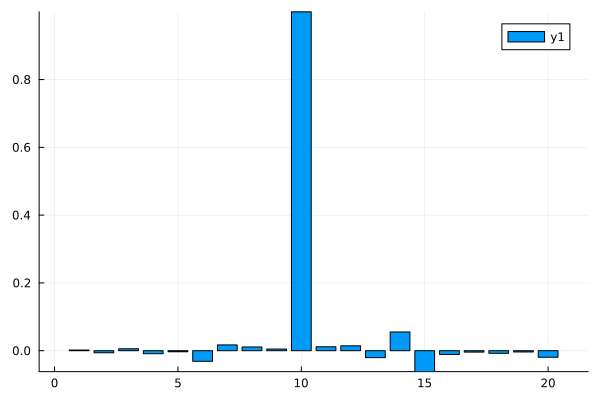

In [95]:
bar([x[end] for x in vec(sxs)])

In [96]:
yy = v_unbind(sym_spk, v_bind(fac_spk[1],fac_spk[3], spk_args=sa, tspan=tspan), spk_args=sa, tspan=tspan)

Spike Train: (1, 1024) with 17904 spikes.

In [97]:
sys = similarity_outer(yy, Y_cb2, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

1×20 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … 0.0142273 0.0142322]  …  [-1.0 -1.0 … -0.0231052 -0.0231292]

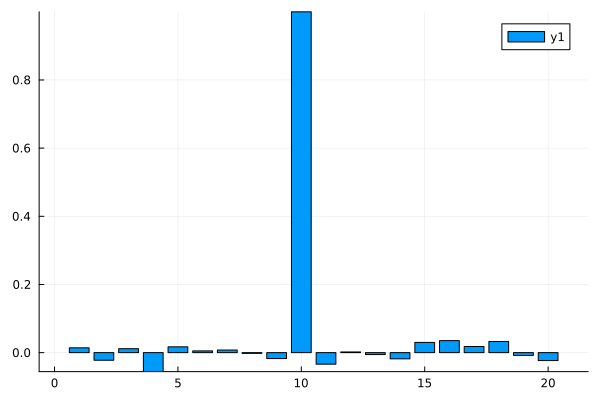

In [98]:
bar([x[end] for x in vec(sys)])

In [99]:
zz = v_unbind(sym_spk, v_bind(fac_spk[1],fac_spk[2], spk_args=sa, tspan=tspan), spk_args=sa, tspan=tspan)

Spike Train: (1, 1024) with 17986 spikes.

In [100]:
szs = similarity_outer(zz, Z_cb2, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

1×20 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … 0.0365894 0.0366263]  …  [-1.0 -1.0 … -0.0543508 -0.0543817]

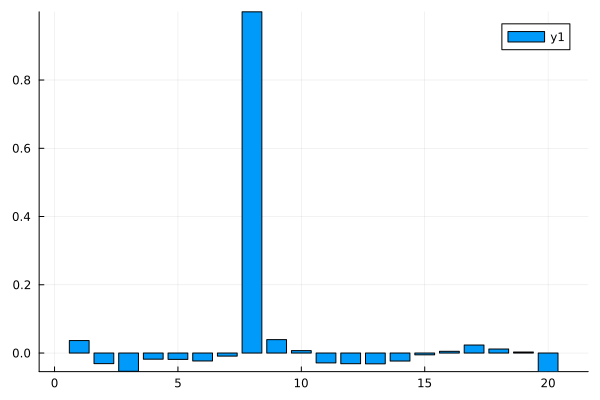

In [101]:
bar([x[end] for x in vec(szs)])

In [102]:
fac_i

3-element Vector{Int64}:
 10
 10
  8

In [103]:
x_cb, y_cb, z_cb = initialize_guesses(X_cb, Y_cb, Z_cb)

3-element Vector{Matrix{Float64}}:
 [-0.3118516682133343 -0.8397313616817647 … -0.03904805655341562 0.2721625067653834]
 [-0.6810578246917321 -0.42480320647416536 … -0.3552664077147969 0.11431593449203054]
 [0.8193708882692188 -0.5525405735062825 … -0.8322153812696155 -0.7550650631432823]

In [104]:
x_cbs, y_cbs, z_cbs = initialize_guesses(sa, tspan, X_cb2, Y_cb2, Z_cb2)

3-element Vector{SpikeTrain}:
 Spike Train: (1, 1024) with 20480 spikes.
 Spike Train: (1, 1024) with 20480 spikes.
 Spike Train: (1, 1024) with 20480 spikes.

In [105]:
#check simliarity of initial guesses

In [106]:
similarity(train_to_phase(x_cbs, spk_args=sa)[end-1,1:1,:], x_cb)

1×1 Matrix{Float64}:
 0.9997922371274574

In [107]:
similarity(train_to_phase(y_cbs, spk_args=sa)[end-1,1:1,:], y_cb)

1×1 Matrix{Float64}:
 0.9997897112712929

In [108]:
similarity(train_to_phase(z_cbs, spk_args=sa)[end-1,1:1,:], z_cb)

1×1 Matrix{Float64}:
 0.9997966972808544

In [109]:
function refine2(composite::AbstractArray, factor_codebook::AbstractArray, external::AbstractMatrix)
    #bind the symbols for external factors
    external = v_bind(external, dims=1)

    #unbind external factors from the composite symbol
    factor = v_unbind(composite, external)

    #calculate the similarity to the codebook
    s = similarity_outer(factor, factor_codebook, dims=1)
    s = abs.(dropdims(s, dims=1))
    w = normalize(s)
    new_guess = v_bundle_project(factor_codebook, w, zeros((size(s,1), size(factor_codebook,2))))
    return s, w, new_guess
end 

function refine2(composite::SpikeTrain, factor_codebook::SpikeTrain, external::Array{<:SpikeTrain}, spk_args::SpikingArgs, tspan::Tuple{<:Real, <:Real})
    #bind the symbols for external factors
    bindfn = (x, y) -> v_bind(x, y, spk_args=spk_args, tspan=tspan)
    external = reduce(bindfn, external)
    #return external

    #unbind external factors from the composite symbol
    factor = v_unbind(composite, external, spk_args=spk_args, tspan=tspan)

    #calculate the similarity to the codebook
    s = similarity_outer(factor_codebook, factor, dims=1, reduce_dim=2, spk_args=spk_args, tspan=tspan)
    w = reshape(abs.([x[end] for x in vec(s)]), (1, :))
    w = normalize(w)
    new_guess = v_bundle_project(factor_codebook, w, zeros((size(w,1), size(factor_codebook)[2])), spk_args=spk_args, tspan=tspan)
    return s, w, new_guess
end

refine2 (generic function with 2 methods)

In [110]:
ss, ws, rs = refine2(sym_spk, X_cb2, [y_cbs, z_cbs], sa, tspan)

([[-1.0 -1.0 … -0.018583481410014174 -0.01860036835445781]; [-1.0 -1.0 … -0.023463343882352775 -0.0234684816104404]; … ; [-1.0 -1.0 … 0.0005526550655432956 0.0005570322793519296]; [-1.0 -1.0 … -0.019404081080709616 -0.019409513656629063];;], [0.25180518206750974 0.31770797073213164 … 0.007540905203959397 0.26275910385279916], Spike Train: (1, 1024) with 20480 spikes.)

In [111]:
sp, wp, rp = refine2(sym_phase, X_cb, cat(y_cb, z_cb, dims=1))

([0.018850474160365383 0.02350577126761962 … 0.001076516996827086 0.019652692625074637], [0.2557163416732871 0.31886783248152756 … 0.014603504709528228 0.26659884623381086], [-0.4393347655427724 -0.8861643113078642 … 0.04941044141714432 0.29043526263183717])

In [112]:
ss = cat(ss..., dims=1);

In [113]:
size(ss)

(20, 2001)

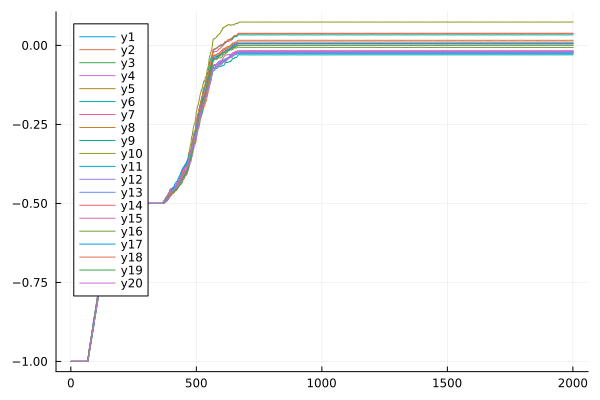

In [114]:
plot(ss')

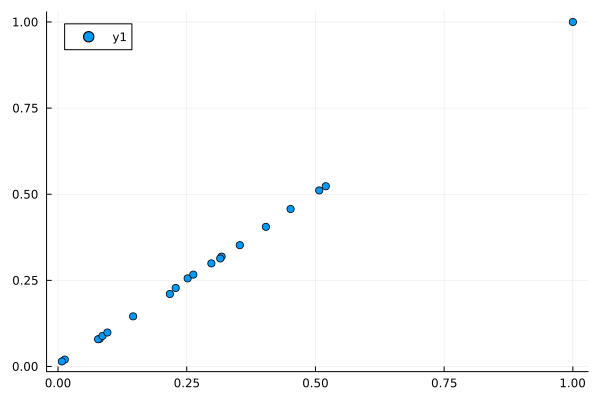

In [115]:
scatter(vec(ws), vec(wp))

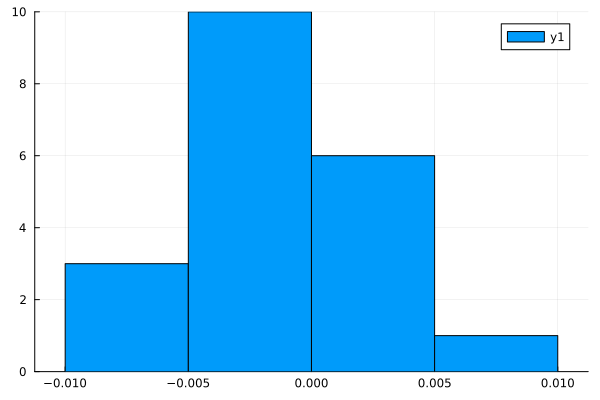

In [116]:
histogram(vec(ws) .- vec(wp))

In [117]:
rs_dec = train_to_phase(rs, sa);

In [118]:
size(rs_dec)

(20, 1, 1024)

In [119]:
[sum(isnan.(rs_dec[i,:,:])) for i in axes(rs_dec,1)]

20-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

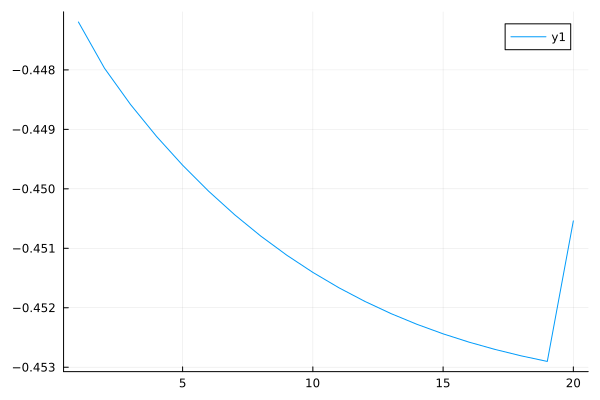

In [120]:
plot(rs_dec[:,1,40])

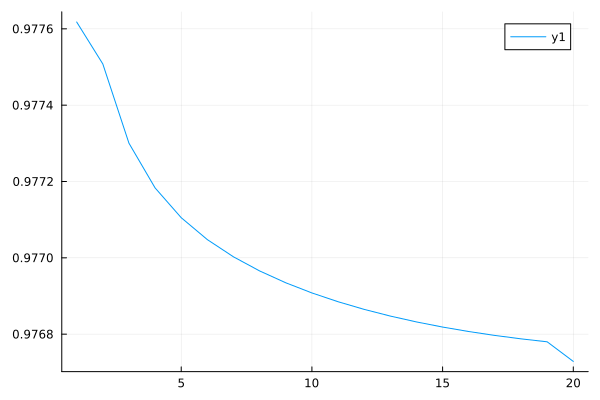

In [121]:
plot([similarity(zero_nans(rs_dec[i,:,:]), rp)[1] for i in axes(rs_dec,1)])

In [122]:
sr = similarity_outer(X_cb2, rs, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

20×1 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … 0.14586290163258658 0.14585651635257527]
 [-1.0 -1.0 … 0.17252026762713962 0.17249226461215614]
 [-1.0 -1.0 … 0.047710712579501775 0.04770646777461204]
 [-1.0 -1.0 … -0.011320722012665409 -0.011308654180530467]
 [-1.0 -1.0 … 0.0288862270564258 0.02889711088331049]
 [-1.0 -1.0 … 0.19833129712150124 0.19832535191407627]
 [-1.0 -1.0 … 0.2810002785533839 0.28098150096709784]
 [-1.0 -1.0 … 0.1050340062524181 0.10500411116461977]
 [-1.0 -1.0 … 0.25411064599980593 0.2541416013456584]
 [-1.0 -1.0 … 0.5784689100429004 0.5784429330191971]
 [-1.0 -1.0 … 0.18994987708046174 0.1899409371773522]
 [-1.0 -1.0 … 0.16629421358658505 0.16632400033957634]
 [-1.0 -1.0 … 0.12279801109717185 0.12279726488047658]
 [-1.0 -1.0 … 0.11832594370217701 0.11836406866570921]
 [-1.0 -1.0 … 0.07394954447505137 0.07395326646575037]
 [-1.0 -1.0 … 0.013069755778161031 0.013073060710268494]
 [-1.0 -1.0 … 0.05808714826280719 0.058104801386885466]
 [-1.0 -1.0 … 0.29325673220471243 

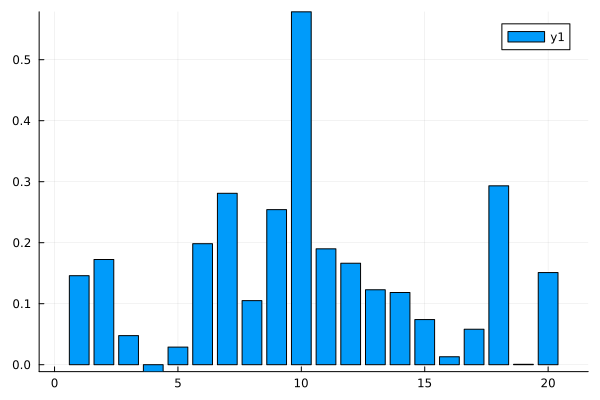

In [123]:
bar([x[end] for x in vec(sr)])

In [124]:
g = resonate(sym_spk, sa, tspan, 10,  X_cb2, Y_cb2, Z_cb2)

11-element Vector{Vector{SpikeTrain}}:
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20479 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes.,

In [125]:
function final_similarity(train::SpikeTrain, codebook::SpikeTrain; spk_args::SpikingArgs, tspan::Tuple{<:Real, <:Real})
    sim = similarity_outer(train, codebook, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)
    sim_final = [s[end] for s in sim]
    return sim_final
end

final_similarity (generic function with 1 method)

In [126]:
xmapfn = x -> final_similarity(x[1], X_cb2, spk_args=sa, tspan=tspan)

#103 (generic function with 1 method)

In [127]:
xsims = cat(map(xmapfn, g)..., dims=1)

11×20 Matrix{Float64}:
 0.232967     0.188507    0.232712    …   0.224112      0.201143
 0.145857     0.172492    0.0477065       0.000622102   0.151062
 0.154058     0.146405    0.120263        0.265479      0.219864
 0.00670645   0.0139479   0.0419344       0.0298919     0.0115911
 0.00628983  -0.00599257  0.00791945     -0.000626067  -0.00620021
 0.00304675  -0.00462087  0.00843226  …  -0.00217025   -0.00902071
 0.00260898  -0.00452753  0.00854311     -0.00202828   -0.00911349
 0.00259484  -0.00451174  0.00853735     -0.0020312    -0.0091332
 0.00259426  -0.004506    0.00853478     -0.00203059   -0.0091331
 0.00259412  -0.00450562  0.00853444     -0.00203049   -0.0091332
 0.00259413  -0.00450562  0.00853443  …  -0.00203051   -0.00913323

In [128]:
ymapfn = x -> final_similarity(x[2], Y_cb2, spk_args=sa, tspan=tspan)

#105 (generic function with 1 method)

In [129]:
ysims = cat(map(ymapfn, g)..., dims=1)

11×20 Matrix{Float64}:
 0.181166    0.201108    0.199736   …  0.194215    0.220021     0.1943
 0.0601128   0.115627    0.105716      0.0285108   0.233925     0.300929
 0.117929    0.0434207   0.142221      0.0720085   0.195545     0.103166
 0.0643125  -0.0211752   0.0279339     0.0837533   0.028736     0.01423
 0.0237484  -0.00966711  0.014554      0.0467644  -0.00628469  -0.0110488
 0.0202098  -0.0101254   0.0157369  …  0.0470993  -0.00586211  -0.0130603
 0.0202842  -0.0101636   0.015992      0.0469244  -0.00608783  -0.0131756
 0.020304   -0.0101909   0.015973      0.0469328  -0.00609795  -0.0131877
 0.0203041  -0.0101951   0.0159727     0.0469343  -0.00609814  -0.0131917
 0.0203039  -0.010195    0.0159728     0.0469342  -0.00609815  -0.0131917
 0.0203039  -0.010195    0.0159728  …  0.0469343  -0.00609818  -0.0131917

In [132]:
zmapfn = x -> final_similarity(x[3], Z_cb2, spk_args=sa, tspan=tspan)

#109 (generic function with 1 method)

In [133]:
zsims = cat(map(zmapfn, g)..., dims=1)

11×20 Matrix{Float64}:
 0.197033    0.204353     0.184262   …  0.196816   0.205849     0.180101
 0.411092    0.0645806    0.0365167     0.103278   0.0387109    0.122434
 0.241547    0.00842082   0.0812946     0.037822   0.0118444    0.0336097
 0.141624   -0.0184936   -0.0238757     0.0879341  0.00644681  -0.00984514
 0.0677671  -0.0124884   -0.0243477     0.0185213  0.00357796  -0.0281279
 0.0582294  -0.0149681   -0.0252289  …  0.0176375  0.00475014  -0.027765
 0.0580194  -0.0154008   -0.0257878     0.0177154  0.00493514  -0.0277811
 0.0579884  -0.0154297   -0.0257995     0.0177321  0.00495662  -0.0277773
 0.0579901  -0.0154304   -0.0257982     0.0177331  0.0049553   -0.0277737
 0.0579904  -0.015431    -0.0257988     0.0177337  0.0049549   -0.0277736
 0.0579904  -0.015431    -0.0257989  …  0.0177337  0.00495493  -0.0277736

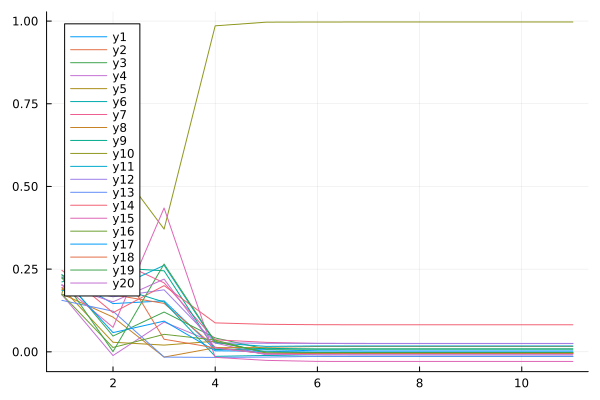

In [131]:
plot(xsims)

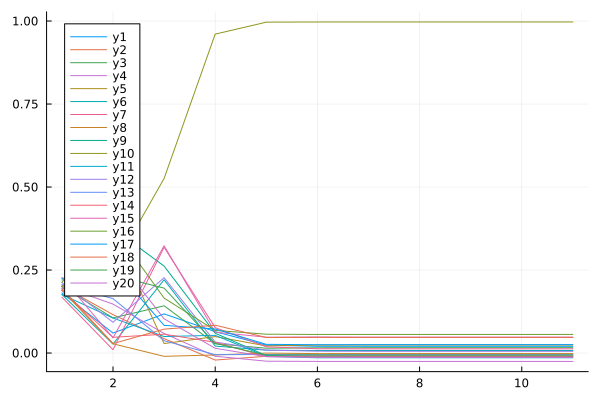

In [134]:
plot(ysims)

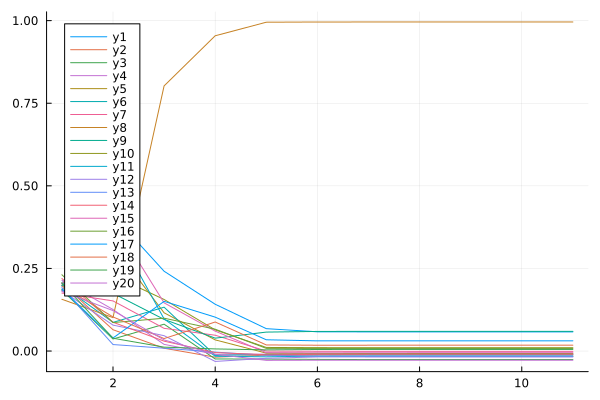

In [135]:
plot(zsims)

In [136]:
allsims = stack((xsims', ysims', zsims'), dims=1)

3×20×11 Array{Float64, 3}:
[:, :, 1] =
 0.232967  0.188507  0.232712  0.172615  …  0.2219    0.224112  0.201143
 0.181166  0.201108  0.199736  0.201514     0.194215  0.220021  0.1943
 0.197033  0.204353  0.184262  0.214217     0.196816  0.205849  0.180101

[:, :, 2] =
 0.145857   0.172492   0.0477065  …  0.293229   0.000622102  0.151062
 0.0601128  0.115627   0.105716      0.0285108  0.233925     0.300929
 0.411092   0.0645806  0.0365167     0.103278   0.0387109    0.122434

[:, :, 3] =
 0.154058  0.146405    0.120263   …  0.0379712  0.265479   0.219864
 0.117929  0.0434207   0.142221      0.0720085  0.195545   0.103166
 0.241547  0.00842082  0.0812946     0.037822   0.0118444  0.0336097

;;; … 

[:, :, 9] =
 0.00259426  -0.004506    0.00853478  -0.00679502  …  -0.00203059  -0.0091331
 0.0203041   -0.0101951   0.0159727   -0.0252512      -0.00609814  -0.0131917
 0.0579901   -0.0154304  -0.0257982   -0.00870252      0.0049553   -0.0277737

[:, :, 10] =
 0.00259412  -0.00450562   0.00853

In [137]:
xc, xi = extract_trends(fac_i[1], xsims')

([0.17717349440965988, 0.5784429330191971, 0.371041223582957, 0.9856805243848161, 0.9967146636453832, 0.9971928913340988, 0.9972210591221202, 0.9972225628580706, 0.9972224774046355, 0.9972224892458973, 0.9972224917981733], [0.23296650176916403 0.14585651635257527 … 0.0025941171975930703 0.0025941281206405507; 0.18850675128156708 0.17249226461215614 … -0.004505619213197396 -0.0045056150602362285; … ; 0.22411217640904746 0.0006221020744181672 … -0.00203049368557184 -0.0020305130514758907; 0.20114301730735148 0.1510623511039664 … -0.009133195560231155 -0.009133225567621929])

In [138]:
xc

11-element Vector{Float64}:
 0.17717349440965988
 0.5784429330191971
 0.371041223582957
 0.9856805243848161
 0.9967146636453832
 0.9971928913340988
 0.9972210591221202
 0.9972225628580706
 0.9972224774046355
 0.9972224892458973
 0.9972224917981733

In [139]:
xi

19×11 Matrix{Float64}:
 0.232967   0.145857      0.154058   …   0.00259412    0.00259413
 0.188507   0.172492      0.146405      -0.00450562   -0.00450562
 0.232712   0.0477065     0.120263       0.00853444    0.00853443
 0.172615  -0.0113087     0.0900272     -0.00679491   -0.00679492
 0.193253   0.0288971     0.0203087     -0.00390355   -0.00390353
 0.172116   0.198325      0.150465   …  -0.0137268    -0.0137268
 0.193784   0.280982      0.208372       0.0248904     0.0248904
 0.174633   0.105004     -0.0158663      0.016283      0.016283
 0.211396   0.254142      0.244963       0.00842598    0.00842596
 0.185116   0.189941      0.261588       0.0176237     0.0176237
 0.201692   0.166324      0.187431   …   0.0253789     0.0253789
 0.15554    0.122797     -0.0159377     -0.0135088    -0.0135088
 0.246493   0.118364      0.200073       0.0817407     0.0817407
 0.202887   0.0739533     0.434814      -0.0290718    -0.0290718
 0.173761   0.0130731     0.0528359     -0.00324246   -0.00324

In [140]:
all_c, all_i = extract_all_trends(fac_i, xsims', ysims', zsims')

([0.17717349440965988 0.5784429330191971 … 0.9972224892458973 0.9972224917981733; 0.20205847433306087 0.25480906356725697 … 0.9970710247382125 0.9970710163661534; 0.15661898859682918 0.10125952758021817 … 0.995804289089076 0.9958042967503496], [0.23296650176916403 0.14585651635257527 … 0.0025941171975930703 0.0025941281206405507; 0.18850675128156708 0.17249226461215614 … -0.004505619213197396 -0.0045056150602362285; … ; 0.20584875463989646 0.03871091622258101 … 0.004954904759222828 0.0049549303155358455; 0.180100561320063 0.12243375782975204 … -0.027773604080546528 -0.02777361311541449])

In [141]:
all_c |> size

(3, 11)

In [142]:
all_i |> size

(57, 11)

In [143]:
check(fac_i, xsims', ysims', zsims')

3-element Vector{Bool}:
 1
 1
 1

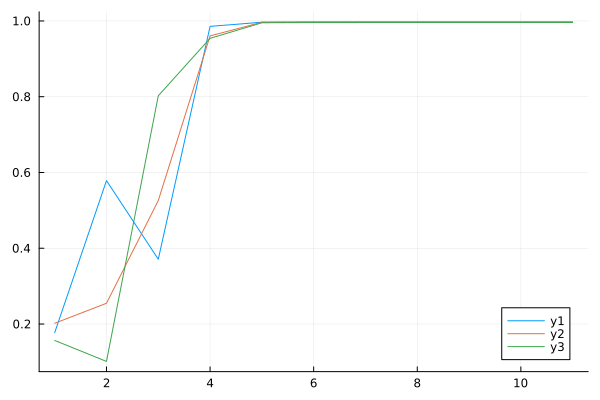

In [144]:
plot(all_c')

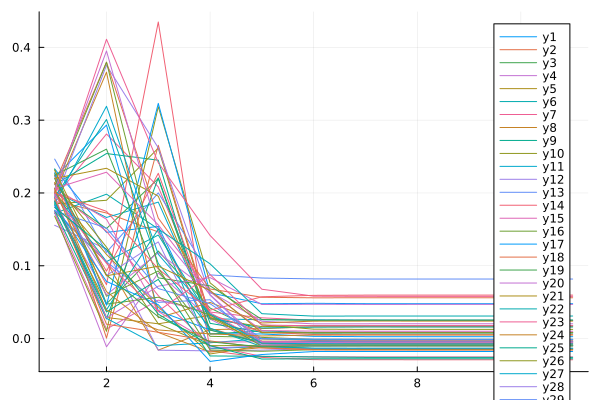

In [145]:
plot(all_i')

In [146]:
fac_i

3-element Vector{Int64}:
 10
 10
  8

In [147]:
rng0

Xoshiro(0x17f2401d96add69a, 0xe986dbd2a93e34e7, 0x6c0a540c70c835c5, 0xea169b37c8cb963a, 0x1dac972c6a4f2be7)

In [149]:
@time a0, t0 = factor3_test_spiking(rng0, 20, 1024, 20, sa, 10)

In [56]:
a0

3-element Vector{Bool}:
 1
 1
 1

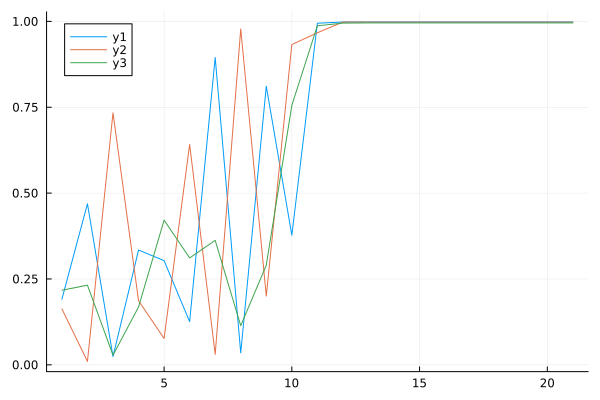

In [57]:
plot(t0[1]')

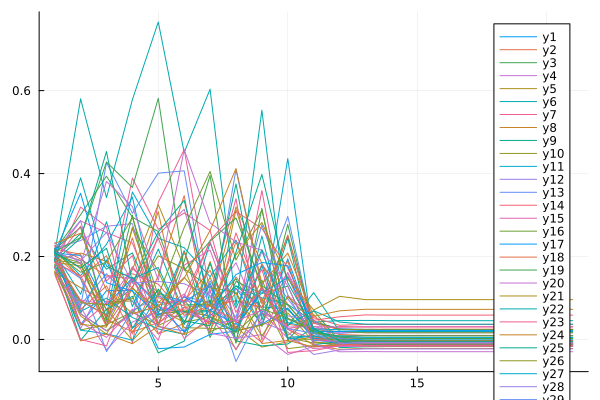

In [58]:
plot(t0[2]')